# Deal Hector B3 LA MANU - Amiens
## TP Siluriformes

### Nous allons utiliser lee fichier représentant les ventes de poisson-chats en amérique du nord de 1986 à 2012 en milliers de livres (in 1000s of Pounds).

Importation des bibliothèques utilisées pour l'analyse de série temporelles et les prévisions
    -> pmdarima pour la modélisation de statistique,
    -> pandas & numpy pour la manipulation des données,
    -> ainsi que matplotlib pour la visualisation graphique

In [17]:
import pmdarima as pm
import pandas
import numpy
import matplotlib.pyplot as plt

from statsmodels.tsa.api import graphics

### Nous allons récupérer notre dataset, et afficher les premières et dernières lignes de celui-ci
1. Importer le dataset catfish

In [18]:
catfish_sales = pandas.read_csv('./data/catfish.csv', index_col=0, parse_dates=True)
catfish_sales.head()
catfish_sales.tail()

,Total
Date,
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795
2012-11-01,13352
2012-12-01,12716


2. Tracer la courbe de vente de poisson-chats

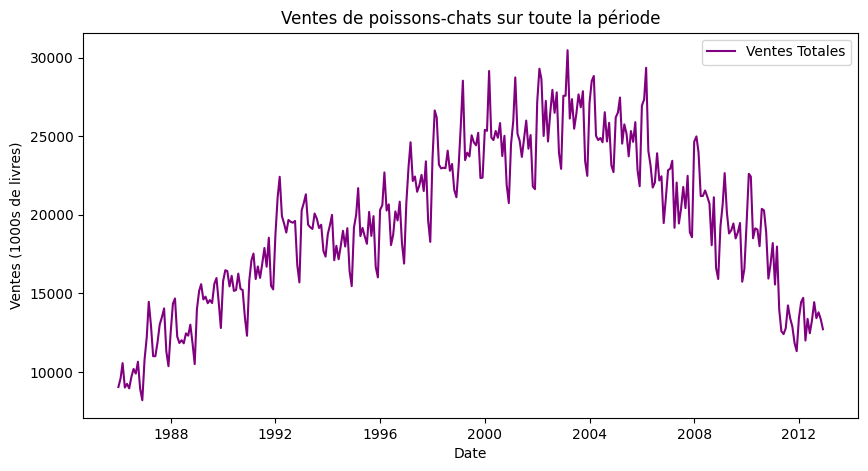

In [19]:
# Tracer de la courbe des ventes
plt.figure(figsize=(10, 5))
plt.plot(catfish_sales, label="Ventes Totales", color='purple')

plt.xlabel("Date")
plt.ylabel("Ventes (1000s de livres)")
plt.title("Ventes de poissons-chats sur toute la période")
plt.legend()
plt.show()


3. Tracer la courbe de vente de 1996 à 2000

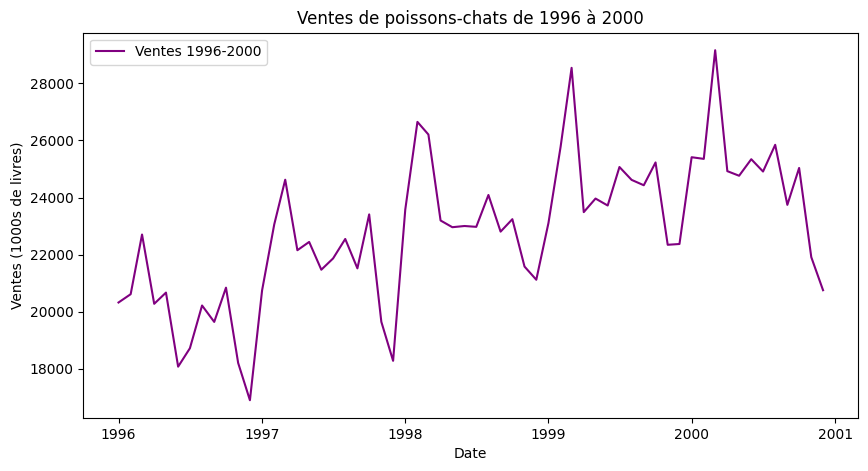

In [20]:

# Tracer de la courbe des ventes entre 1996 et 2000
catfish_96_00 = catfish_sales['1996':'2000']
plt.figure(figsize=(10, 5))
plt.plot(catfish_96_00, label="Ventes 1996-2000", color='purple')
plt.xlabel("Date")
plt.ylabel("Ventes (1000s de livres)")
plt.title("Ventes de poissons-chats de 1996 à 2000")
plt.legend()
plt.show()

4. Quelle est la moyenne des ventes 

    -> sur l’année 92 ?

    -> sur la décennie 90 (1990 à 1999) ?

    -> sur l’ensemble du dataset ?

In [21]:
# Calcul des moyennes
mean_92 = catfish_sales.loc['1992'].mean()
mean_90s = catfish_sales.loc['1990':'1999'].mean()
mean_total = catfish_sales.mean()


print(f"Moyenne des ventes en 1992: {mean_92.iloc[0]:.2f} (1000s de livres)")
print(f"Moyenne des ventes dans les années 90: {mean_90s.iloc[0]:.2f} (1000s de livres)")
print(f"Moyenne des ventes sur l'ensemble du dataset: {mean_total.iloc[0]:.2f} (1000s de livres)")

Moyenne des ventes en 1992: 19278.00 (1000s de livres)
Moyenne des ventes dans les années 90: 19701.81 (1000s de livres)
Moyenne des ventes sur l'ensemble du dataset: 19643.98 (1000s de livres)


5. Quelle est la médiane des ventes - sur l’année 92 ? - sur la décennie 90 (1990 à 1999) ? - sur l’ensemble du dataset ?

In [22]:

# Calcul des médianes
median_92 = catfish_sales.loc['1992'].median()
median_90s = catfish_sales.loc['1990':'1999'].median()
median_total = catfish_sales.median()



print(f"Médiane des ventes en 1992: {median_92.iloc[0]:.2f} (1000s de livres)")
print(f"Médiane des ventes dans les années 90: {median_90s.iloc[0]:.2f} (1000s de livres)")
print(f"Médiane des ventes sur l'ensemble du dataset: {median_total.iloc[0]:.2f} (1000s de livres)")



Médiane des ventes en 1992: 19529.50 (1000s de livres)
Médiane des ventes dans les années 90: 19477.00 (1000s de livres)
Médiane des ventes sur l'ensemble du dataset: 19660.50 (1000s de livres)


6. Quelle est le mode des ventes

    -> sur l’année 92 ?

    -> sur la décennie 90 (1990 à 1999) ?

    -> sur l’ensemble du dataset ?